In [1]:
#All the header files required for the code

#The NumPy library contains multidimensional array and matrix data structures 
import numpy as np

#Provides fast, flexible, and expressive data structures designed to make working with "relational" or "labeled" 
#data both easy and intuitive
import pandas as pd

#from factor_analyzer import FactorAnalyzer

#Matplotlib is a cross-platform, data visualization and graphical plotting library for Python and its numerical extension NumPy
import matplotlib.pyplot as plt

#K-Means clustering is a simple yet very effective unsupervised machine learning algorithm for data clustering
from sklearn.cluster import KMeans
from sklearn import metrics

#Random draws are often used to make a decision where no rational or fair basis exists for making 
#a deterministic decision, or to make unpredictable moves.
import random


In [2]:
#Import csv files that we created with a specific form
data1 = pd.read_csv('ratings_100k.csv')
data2 = pd.read_csv('products.csv')

In [3]:
#Delete unnecessary columns like the timestamp in our csv 

#DATA1 = RATINGS
#DATA2 = PRODUCTS

# function which is used in removing or deleting columns from the csv files
data1 = data1.drop(['timestamp'], axis=1)  
print (data1)


       userId  productId  rating
0           1          7       3
1           2         30       3
2           3         51       5
3           4         28       2
4           5         44       5
...       ...        ...     ...
99995   99996         27       4
99996   99997         34       1
99997   99998         50       2
99998   99999         58       4
99999  100000         11       1

[100000 rows x 3 columns]


In [4]:
#.head() is used for the first 5 index and then if you put a desired number in the (...) you can see the desired lines 
data1.head()

,userId,productId,rating
0,1,7,3
1,2,30,3
2,3,51,5
3,4,28,2
4,5,44,5


In [5]:
#.head() is used for the first 5 index and then if you put a desired number in the (...) you can see the desired lines
data2.head()

,productId,products,category
0,1,Iphone 13 Pro Max,flagship
1,2,Iphone 13 Pro,high_end
2,3,Iphone 13,high_end
3,4,Iphone 13 Mini,high_end
4,5,Iphone 12 Pro Max,high_end


In [6]:
#Merging both dataframes
#note that : to merge the matrixies they both have to be as Dataframes 
data = pd.merge(data2 , data1 , how='outer', on='productId') 


In [7]:
# RAW DATA - BASIC MATRIX Dataframe

data.head() 


,productId,products,category,userId,rating
0,1,Iphone 13 Pro Max,flagship,57,1
1,1,Iphone 13 Pro Max,flagship,252,5
2,1,Iphone 13 Pro Max,flagship,282,5
3,1,Iphone 13 Pro Max,flagship,300,2
4,1,Iphone 13 Pro Max,flagship,325,3


In [8]:
#Now we are splitting the products for each category
df_flagship = data[(data['category']=='flagship')]

df_flagship

,productId,products,category,userId,rating
0,1,Iphone 13 Pro Max,flagship,57,1
1,1,Iphone 13 Pro Max,flagship,252,5
2,1,Iphone 13 Pro Max,flagship,282,5
3,1,Iphone 13 Pro Max,flagship,300,2
4,1,Iphone 13 Pro Max,flagship,325,3
...,...,...,...,...,...
87195,51,Realme GT 2 Pro,flagship,99647,5
87196,51,Realme GT 2 Pro,flagship,99672,2
87197,51,Realme GT 2 Pro,flagship,99732,5
87198,51,Realme GT 2 Pro,flagship,99743,5


In [9]:
#We calculate the counts 
df_flagship_count = df_flagship['productId'].value_counts()

df_flagship_count

46    1700
51    1700
41    1500
1     1400
11    1100
21    1000
31    1000
Name: productId, dtype: int64

In [10]:
#We convert the array to dataframe , we rename the columns to 'counts' and reset the index to start from 0
df_flagship_count = df_flagship_count.rename_axis('productId').reset_index(name='counts')

df_flagship_count

,productId,counts
0,46,1700
1,51,1700
2,41,1500
3,1,1400
4,11,1100
5,21,1000
6,31,1000


In [11]:
#We calculate the median value and we groupby each product to summarize them  
df_flagship_median = df_flagship.groupby('productId',as_index= False)
df_flagship_median = df_flagship_median.median()

#We drop the uneeded column
df_flagship_median = df_flagship_median.drop(['userId'], axis=1)

df_flagship_median

,productId,rating
0,1,3.0
1,11,3.0
2,21,3.5
3,31,3.0
4,41,3.0
5,46,4.0
6,51,5.0


In [12]:
#We drop the duplicate strings to take every different products 
df_flagship_names = df_flagship.drop_duplicates('products')


df_flagship_names = df_flagship_names.drop(['userId'], axis=1)
df_flagship_names = df_flagship_names.drop(['category'], axis=1)
df_flagship_names = df_flagship_names.drop(['rating'], axis=1)
#Besides that we can use a different approach to make the names dataframe without using the .drop 3 times 
#and that tool is the .filter as shown below 

#df_flagship_names=df_flagship_names.filter(items=['productId','products'])

df_flagship_names

,productId,products
0,1,Iphone 13 Pro Max
17000,11,Samsung Galaxy S22 Ultra
34200,21,Huawei P50 Pro
50700,31,Xiaomi 12 Pro
68900,41,Google Pixel 6 Pro
77000,46,One Plus 10 Pro
85500,51,Realme GT 2 Pro


In [13]:
#At the end we use the merge to unite the dataframes that are crucial for our final view 
df_flagship_merged = pd.merge(df_flagship_median,df_flagship_names)

df_flagship_merged

,productId,rating,products
0,1,3.0,Iphone 13 Pro Max
1,11,3.0,Samsung Galaxy S22 Ultra
2,21,3.5,Huawei P50 Pro
3,31,3.0,Xiaomi 12 Pro
4,41,3.0,Google Pixel 6 Pro
5,46,4.0,One Plus 10 Pro
6,51,5.0,Realme GT 2 Pro


In [14]:
#At the end we use the merge to unite the dataframe that are crucial for our final view 
df_flagship_merged = pd.merge(df_flagship_merged,df_flagship_count)

df_flagship_merged

,productId,rating,products,counts
0,1,3.0,Iphone 13 Pro Max,1400
1,11,3.0,Samsung Galaxy S22 Ultra,1100
2,21,3.5,Huawei P50 Pro,1000
3,31,3.0,Xiaomi 12 Pro,1000
4,41,3.0,Google Pixel 6 Pro,1500
5,46,4.0,One Plus 10 Pro,1700
6,51,5.0,Realme GT 2 Pro,1700


In [15]:
#HIGH END

In [16]:
#Now we are splitting the products for each category
df_high_end = data[(data['category']=='high_end')]

df_high_end

,productId,products,category,userId,rating
1400,2,Iphone 13 Pro,high_end,28,5
1401,2,Iphone 13 Pro,high_end,65,3
1402,2,Iphone 13 Pro,high_end,67,3
1403,2,Iphone 13 Pro,high_end,236,3
1404,2,Iphone 13 Pro,high_end,241,2
...,...,...,...,...,...
99995,60,Realme Gt Neo 3 Pro,high_end,99756,1
99996,60,Realme Gt Neo 3 Pro,high_end,99808,1
99997,60,Realme Gt Neo 3 Pro,high_end,99843,5
99998,60,Realme Gt Neo 3 Pro,high_end,99859,3


In [17]:
#We calculate the counts 
df_high_end_count = df_high_end['productId'].value_counts()

df_high_end_count

22    2300
8     2300
48    2100
14    2100
2     2000
4     2000
6     1800
32    1800
59    1700
23    1700
17    1700
12    1600
42    1600
27    1500
7     1400
5     1400
15    1300
52    1300
24    1200
13    1100
60    1100
3      900
47     800
Name: productId, dtype: int64

In [18]:
#We convert the array to dataframe , we rename the columns to 'counts' and reset the index to start from 0
df_high_end_count = df_high_end_count.rename_axis('productId').reset_index(name='counts')

df_high_end_count

,productId,counts
0,22,2300
1,8,2300
2,48,2100
3,14,2100
4,2,2000
5,4,2000
6,6,1800
7,32,1800
8,59,1700
9,23,1700


In [19]:
#We calculate the median value and we groupby each product to summarize them  
df_high_end_median = df_high_end.groupby('productId',as_index= False)
df_high_end_median = df_high_end_median.median()

#We drop the uneeded column
df_high_end_median = df_high_end_median.drop(['userId'], axis=1)

df_high_end_median.head(20)

,productId,rating
0,2,2.5
1,3,4.0
2,4,2.0
3,5,3.0
4,6,3.0
5,7,3.0
6,8,3.0
7,12,2.0
8,13,3.0
9,14,3.0


In [20]:
#We drop the duplicate strings to take every different products 
df_high_end_names = df_high_end.drop_duplicates('products')

df_high_end_names = df_high_end_names.drop(['userId'], axis=1)
df_high_end_names = df_high_end_names.drop(['category'], axis=1)
df_high_end_names = df_high_end_names.drop(['rating'], axis=1)

#Besides that we can use a different approach to make the names dataframe without using the .drop 3 times 
#and that tool is the .filter as shown below 

#df_high_end_names=df_high_end_names.filter(items=['productId','products'])

df_high_end_names

,productId,products
1400,2,Iphone 13 Pro
3400,3,Iphone 13
4300,4,Iphone 13 Mini
6300,5,Iphone 12 Pro Max
7700,6,Iphone 12 Pro
9500,7,Iphone 12
10900,8,Iphone 12 Mini
18100,12,Samsung Galaxy S22 Plus
19700,13,Samsung Galaxy S22
20800,14,Samsung Galaxy S21 Ultra


In [21]:
#At the end we use the merge to unite the dataframes that are crucial for our final view 
df_high_end_merged = pd.merge(df_high_end_median,df_high_end_names)

df_high_end_merged

,productId,rating,products
0,2,2.5,Iphone 13 Pro
1,3,4.0,Iphone 13
2,4,2.0,Iphone 13 Mini
3,5,3.0,Iphone 12 Pro Max
4,6,3.0,Iphone 12 Pro
5,7,3.0,Iphone 12
6,8,3.0,Iphone 12 Mini
7,12,2.0,Samsung Galaxy S22 Plus
8,13,3.0,Samsung Galaxy S22
9,14,3.0,Samsung Galaxy S21 Ultra


In [22]:
#At the end we use the merge to unite the dataframe that are crucial for our final view 
df_high_end_merged = pd.merge(df_high_end_merged,df_high_end_count)

df_high_end_merged

,productId,rating,products,counts
0,2,2.5,Iphone 13 Pro,2000
1,3,4.0,Iphone 13,900
2,4,2.0,Iphone 13 Mini,2000
3,5,3.0,Iphone 12 Pro Max,1400
4,6,3.0,Iphone 12 Pro,1800
5,7,3.0,Iphone 12,1400
6,8,3.0,Iphone 12 Mini,2300
7,12,2.0,Samsung Galaxy S22 Plus,1600
8,13,3.0,Samsung Galaxy S22,1100
9,14,3.0,Samsung Galaxy S21 Ultra,2100


In [23]:
#MID RANGE

In [24]:
#Now we are splitting the products for each category
df_mid_range = data[(data['category']=='mid_range')]

df_mid_range

,productId,products,category,userId,rating
13200,9,Iphone 11 Pro Max,mid_range,19,1
13201,9,Iphone 11 Pro Max,mid_range,94,3
13202,9,Iphone 11 Pro Max,mid_range,116,1
13203,9,Iphone 11 Pro Max,mid_range,119,5
13204,9,Iphone 11 Pro Max,mid_range,183,4
...,...,...,...,...,...
97195,58,Realme Gt Neo 2,mid_range,99559,4
97196,58,Realme Gt Neo 2,mid_range,99603,4
97197,58,Realme Gt Neo 2,mid_range,99751,5
97198,58,Realme Gt Neo 2,mid_range,99777,5


In [25]:
#We calculate the counts 
df_mid_range_count = df_mid_range['productId'].value_counts()

df_mid_range_count

16    2500
34    2400
10    2200
18    2100
25    2100
33    2100
19    2000
44    2000
50    2000
56    1900
49    1900
39    1800
45    1800
20    1700
9     1600
53    1500
58    1400
54    1300
55    1300
28    1300
57    1300
43    1200
Name: productId, dtype: int64

In [26]:
#We convert the array to dataframe , we rename the columns to 'counts' and reset the index to start from 0
df_mid_range_count = df_mid_range_count.rename_axis('productId').reset_index(name='counts')

df_mid_range_count

,productId,counts
0,16,2500
1,34,2400
2,10,2200
3,18,2100
4,25,2100
5,33,2100
6,19,2000
7,44,2000
8,50,2000
9,56,1900


In [27]:
#We calculate the median value and we groupby each product to summarize them  
df_mid_range_median = df_mid_range.groupby('productId',as_index= False)
df_mid_range_median = df_mid_range_median.median()

#We drop the uneeded column
df_mid_range_median = df_mid_range_median.drop(['userId'], axis=1)

df_mid_range_median

,productId,rating
0,9,2.0
1,10,4.0
2,16,3.0
3,18,3.0
4,19,3.0
5,20,3.0
6,25,3.0
7,28,4.0
8,33,4.0
9,34,2.5


In [28]:
#We drop the duplicate strings to take every different products 
df_mid_range_names = df_mid_range.drop_duplicates('products')

df_mid_range_names = df_mid_range_names.drop(['userId'], axis=1)
df_mid_range_names = df_mid_range_names.drop(['category'], axis=1)
df_mid_range_names = df_mid_range_names.drop(['rating'], axis=1)
#Besides that we can use a different approach to make the names dataframe without using the .drop 3 times 
#and that tool is the .filter as shown below 

#df_mid_range_names=df_mid_range_names.filter(items=['productId','products'])

df_mid_range_names

,productId,products
13200,9,Iphone 11 Pro Max
14800,10,Iphone 11 Pro
24200,16,Samsung Galaxy S21
28400,18,Samsung Galaxy S20 Plus
30500,19,Samsung Galaxy S20 Fe
32500,20,Samsung Galaxy S20
40400,25,Huawei P40
45800,28,Huawei P30
53500,33,Xiaomi 12X
55600,34,Xiaomi Redmi Note 11 Pro


In [29]:
#At the end we use the merge to unite the dataframes that are crucial for our final view 
df_mid_range_merged = pd.merge(df_mid_range_median,df_mid_range_names)

df_mid_range_merged

,productId,rating,products
0,9,2.0,Iphone 11 Pro Max
1,10,4.0,Iphone 11 Pro
2,16,3.0,Samsung Galaxy S21
3,18,3.0,Samsung Galaxy S20 Plus
4,19,3.0,Samsung Galaxy S20 Fe
5,20,3.0,Samsung Galaxy S20
6,25,3.0,Huawei P40
7,28,4.0,Huawei P30
8,33,4.0,Xiaomi 12X
9,34,2.5,Xiaomi Redmi Note 11 Pro


In [30]:
#At the end we use the merge to unite the dataframe that are crucial for our final view 
df_mid_range_merged = pd.merge(df_mid_range_merged,df_mid_range_count)

df_mid_range_merged

,productId,rating,products,counts
0,9,2.0,Iphone 11 Pro Max,1600
1,10,4.0,Iphone 11 Pro,2200
2,16,3.0,Samsung Galaxy S21,2500
3,18,3.0,Samsung Galaxy S20 Plus,2100
4,19,3.0,Samsung Galaxy S20 Fe,2000
5,20,3.0,Samsung Galaxy S20,1700
6,25,3.0,Huawei P40,2100
7,28,4.0,Huawei P30,1300
8,33,4.0,Xiaomi 12X,2100
9,34,2.5,Xiaomi Redmi Note 11 Pro,2400


In [31]:
#LOW END

In [32]:
#Now we are splitting the products for each category
df_low_end = data[(data['category']=='low_end')]

df_low_end

,productId,products,category,userId,rating
42500,26,Huawei P40 lite,low_end,68,2
42501,26,Huawei P40 lite,low_end,70,1
42502,26,Huawei P40 lite,low_end,108,5
42503,26,Huawei P40 lite,low_end,158,1
42504,26,Huawei P40 lite,low_end,161,2
...,...,...,...,...,...
68895,40,Xiaomi Poco M4 Pro,low_end,99814,5
68896,40,Xiaomi Poco M4 Pro,low_end,99894,3
68897,40,Xiaomi Poco M4 Pro,low_end,99951,3
68898,40,Xiaomi Poco M4 Pro,low_end,99966,3


In [33]:
#We calculate the counts 
df_low_end_count = df_low_end['productId'].value_counts()

df_low_end_count

40    2500
30    1900
26    1800
37    1800
29    1700
35    1700
38    1600
36    1500
Name: productId, dtype: int64

In [34]:
#We convert the array to dataframe , we rename the columns to 'counts' and reset the index to start from 0
df_low_end_count = df_low_end_count.rename_axis('productId').reset_index(name='counts')

df_low_end_count

,productId,counts
0,40,2500
1,30,1900
2,26,1800
3,37,1800
4,29,1700
5,35,1700
6,38,1600
7,36,1500


In [35]:
#We calculate the median value and we groupby each product to summarize them  
df_low_end_median = df_low_end.groupby('productId',as_index= False)
df_low_end_median = df_low_end_median.median()

#We drop the uneeded column
df_low_end_median = df_low_end_median.drop(['userId'], axis=1)

df_low_end_median.head(20)

,productId,rating
0,26,3.5
1,29,3.0
2,30,2.0
3,35,3.0
4,36,3.0
5,37,3.0
6,38,2.0
7,40,3.0


In [36]:
#We drop the duplicate strings to take every different products 
df_low_end_names = df_low_end.drop_duplicates('products')

df_low_end_names = df_low_end_names.drop(['userId'], axis=1)
df_low_end_names = df_low_end_names.drop(['category'], axis=1)
df_low_end_names = df_low_end_names.drop(['rating'], axis=1)
#Besides that we can use a different approach to make the names dataframe without using the .drop 3 times 
#and that tool is the .filter as shown below 

#df_low_end_names=df_low_end_names.filter(items=['productId','products'])

df_low_end_names

,productId,products
42500,26,Huawei P40 lite
47100,29,Huawei Nova 9
48800,30,Huawei 8i
58000,35,Xiaomi Redmi Note 11
59700,36,Xiaomi Redmi Note 10 Pro
61200,37,Xiaomi Redmi Note 10
63000,38,Xiaomi Redmi Note 9 Pro
66400,40,Xiaomi Poco M4 Pro


In [37]:
#At the end we use the merge to unite the dataframes that are crucial for our final view 
df_low_end_merged = pd.merge(df_low_end_median,df_low_end_names)

df_low_end_merged

,productId,rating,products
0,26,3.5,Huawei P40 lite
1,29,3.0,Huawei Nova 9
2,30,2.0,Huawei 8i
3,35,3.0,Xiaomi Redmi Note 11
4,36,3.0,Xiaomi Redmi Note 10 Pro
5,37,3.0,Xiaomi Redmi Note 10
6,38,2.0,Xiaomi Redmi Note 9 Pro
7,40,3.0,Xiaomi Poco M4 Pro


In [38]:
#At the end we use the merge to unite the dataframe that are crucial for our final view 
df_low_end_merged = pd.merge(df_low_end_merged,df_low_end_count)

df_low_end_merged

,productId,rating,products,counts
0,26,3.5,Huawei P40 lite,1800
1,29,3.0,Huawei Nova 9,1700
2,30,2.0,Huawei 8i,1900
3,35,3.0,Xiaomi Redmi Note 11,1700
4,36,3.0,Xiaomi Redmi Note 10 Pro,1500
5,37,3.0,Xiaomi Redmi Note 10,1800
6,38,2.0,Xiaomi Redmi Note 9 Pro,1600
7,40,3.0,Xiaomi Poco M4 Pro,2500


In [39]:
#Flagship calculations with our own algorithm

In [40]:
#Here we choose the weight of each parameter to put at the following algorith 
weight_counts=0.5
weight_median=0.8

In [41]:
#Now we calculate the algorithm score so we can make a new column out of it to compare and make our recomentation 
df_flagship_merged["Algorithm score"] = (df_flagship_merged["counts"] * weight_counts)+(df_flagship_merged["rating"] * weight_median)

#We sort out the vlaues of the algorith score from "best" to "worst"
df_flagship_merged.sort_values(by=['Algorithm score'],inplace=True,ascending=False)
df_flagship_merged

,productId,rating,products,counts,Algorithm score
6,51,5.0,Realme GT 2 Pro,1700,854.0
5,46,4.0,One Plus 10 Pro,1700,853.2
4,41,3.0,Google Pixel 6 Pro,1500,752.4
0,1,3.0,Iphone 13 Pro Max,1400,702.4
1,11,3.0,Samsung Galaxy S22 Ultra,1100,552.4
2,21,3.5,Huawei P50 Pro,1000,502.8
3,31,3.0,Xiaomi 12 Pro,1000,502.4


<AxesSubplot:ylabel='products'>

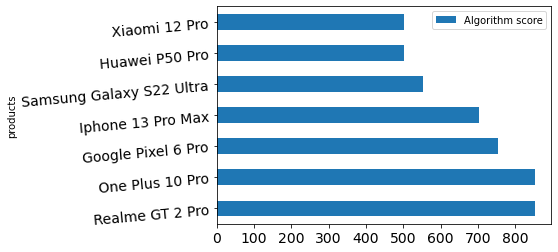

In [42]:
#And at the end we make a plot to visualize represent our outputs 
df_flagship_merged.plot(x="products", y="Algorithm score", kind="barh", rot=5, fontsize=14)

In [43]:
#High end  algorithm

In [44]:
#Now we calculate the algorithm score so we can make a new column out of it to compare and make our recomentation 
df_high_end_merged["Algorithm score"] = (df_high_end_merged["counts"] * weight_counts)+(df_high_end_merged["rating"] * weight_median)

#We sort out the vlaues of the algorith score from "best" to "worst"
df_high_end_merged.sort_values(by=['Algorithm score'],inplace=True,ascending=False)
df_high_end_merged

,productId,rating,products,counts,Algorithm score
12,22,3.0,Huawei P50,2300,1152.4
6,8,3.0,Iphone 12 Mini,2300,1152.4
19,48,3.0,One Plus 8 Pro,2100,1052.4
9,14,3.0,Samsung Galaxy S21 Ultra,2100,1052.4
0,2,2.5,Iphone 13 Pro,2000,1002.0
2,4,2.0,Iphone 13 Mini,2000,1001.6
4,6,3.0,Iphone 12 Pro,1800,902.4
16,32,2.0,Xiaomi 12,1800,901.6
13,23,4.0,Huawei P50 Pocket,1700,853.2
21,59,3.0,Realme Gt Neo 3,1700,852.4


<AxesSubplot:ylabel='products'>

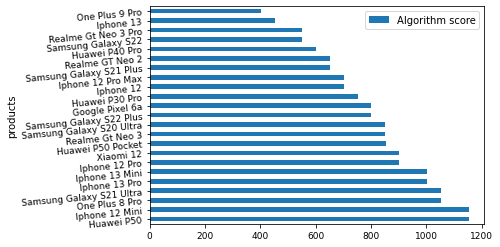

In [45]:
#And at the end we make a plot to visualize represent our outputs 
df_high_end_merged.plot(x="products", y="Algorithm score", kind="barh", rot=5, fontsize=9)

In [46]:
#Mid range  algorithm

In [47]:
#Now we calculate the algorithm score so we can make a new column out of it to compare and make our recomentation 
df_mid_range_merged["Algorithm score"] = (df_mid_range_merged["counts"] * weight_counts)+(df_mid_range_merged["rating"] * weight_median)

#We sort out the vlaues of the algorith score from "best" to "worst"
df_mid_range_merged.sort_values(by=['Algorithm score'],inplace=True,ascending=False)
df_mid_range_merged

,productId,rating,products,counts,Algorithm score
2,16,3.0,Samsung Galaxy S21,2500,1252.4
9,34,2.5,Xiaomi Redmi Note 11 Pro,2400,1202.0
1,10,4.0,Iphone 11 Pro,2200,1103.2
8,33,4.0,Xiaomi 12X,2100,1053.2
3,18,3.0,Samsung Galaxy S20 Plus,2100,1052.4
6,25,3.0,Huawei P40,2100,1052.4
12,44,3.5,Google Pixel 5a,2000,1002.8
4,19,3.0,Samsung Galaxy S20 Fe,2000,1002.4
15,50,3.0,One Plus 8T,2000,1002.4
19,56,3.0,Realme 9 Pro,1900,952.4


<AxesSubplot:ylabel='products'>

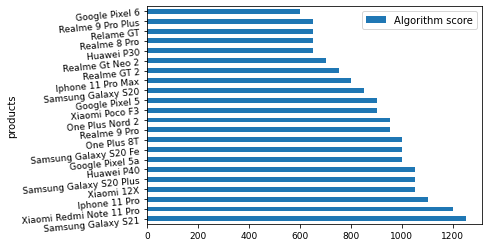

In [48]:
#And at the end we make a plot to visualize represent our outputs 
df_mid_range_merged.plot(x="products", y="Algorithm score", kind="barh", rot=5, fontsize=9)

In [49]:
#Low end algorithm

In [50]:
#Now we calculate the algorithm score so we can make a new column out of it to compare and make our recomentation 
df_low_end_merged["Algorithm score"] = (df_low_end_merged["counts"] * weight_counts)+(df_low_end_merged["rating"] * weight_median)

#We sort out the vlaues of the algorith score from "best" to "worst"
df_low_end_merged.sort_values(by=['Algorithm score'],inplace=True,ascending=False)
df_low_end_merged

,productId,rating,products,counts,Algorithm score
7,40,3.0,Xiaomi Poco M4 Pro,2500,1252.4
2,30,2.0,Huawei 8i,1900,951.6
0,26,3.5,Huawei P40 lite,1800,902.8
5,37,3.0,Xiaomi Redmi Note 10,1800,902.4
1,29,3.0,Huawei Nova 9,1700,852.4
3,35,3.0,Xiaomi Redmi Note 11,1700,852.4
6,38,2.0,Xiaomi Redmi Note 9 Pro,1600,801.6
4,36,3.0,Xiaomi Redmi Note 10 Pro,1500,752.4


<AxesSubplot:ylabel='products'>

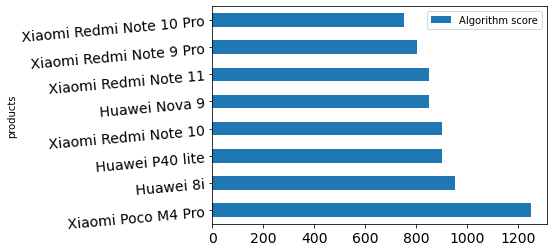

In [51]:
#And at the end we make a plot to visualize represent our outputs 
df_low_end_merged.plot(x="products", y="Algorithm score", kind="barh", rot=5, fontsize=14)